Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import VotingClassifier 
from xgboost import XGBClassifier



Loading the Dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Luminar_Projects/Project_2/hranalytics_train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Basic EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [ ]:
df.shape

(54808, 14)

In [ ]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Fixing Null Values

In [ ]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [ ]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [ ]:
df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [ ]:
df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [ ]:
df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0],inplace=True)

In [ ]:
df.isna().sum()



employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
df['previous_year_rating']=df['previous_year_rating'].astype(int)

Converting Strings into Interger

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           54808 non-null  int64 
 1   department            54808 non-null  object
 2   region                54808 non-null  object
 3   education             54808 non-null  object
 4   gender                54808 non-null  object
 5   recruitment_channel   54808 non-null  object
 6   no_of_trainings       54808 non-null  int64 
 7   age                   54808 non-null  int64 
 8   previous_year_rating  54808 non-null  int64 
 9   length_of_service     54808 non-null  int64 
 10  KPIs_met >80%         54808 non-null  int64 
 11  awards_won?           54808 non-null  int64 
 12  avg_training_score    54808 non-null  int64 
 13  is_promoted           54808 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.9+ MB


In [ ]:
le_dept=LabelEncoder()
le_reg=LabelEncoder()
le_edu=LabelEncoder()
le_gen=LabelEncoder()
le_rech=LabelEncoder()


In [ ]:
df['department'] = le_dept.fit_transform(df['department'])
df['recruitment_channel'] = le_rech.fit_transform(df['recruitment_channel' ])
df['gender'] = le_gen.fit_transform(df['gender'])
df['education'] = le_edu.fit_transform(df['education'])
df['region'] = le_reg.fit_transform(df['region'])
df['department '] = le_dept.fit_transform(df['department'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   employee_id           54808 non-null  int64
 1   department            54808 non-null  int64
 2   region                54808 non-null  int64
 3   education             54808 non-null  int64
 4   gender                54808 non-null  int64
 5   recruitment_channel   54808 non-null  int64
 6   no_of_trainings       54808 non-null  int64
 7   age                   54808 non-null  int64
 8   previous_year_rating  54808 non-null  int64
 9   length_of_service     54808 non-null  int64
 10  KPIs_met >80%         54808 non-null  int64
 11  awards_won?           54808 non-null  int64
 12  avg_training_score    54808 non-null  int64
 13  is_promoted           54808 non-null  int64
 14  department            54808 non-null  int64
dtypes: int64(15)
memory usage: 6.3 MB


Correlation Study of DataSet

In [ ]:
df.corr()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department
employee_id,1.000000,-0.005187,-0.003423,0.002124,-0.001542,0.005960,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206,-0.005187
department,-0.005187,1.000000,-0.020592,0.043441,-0.030108,0.004732,0.014152,0.079162,-0.135561,0.059060,-0.088209,-0.002151,-0.251626,0.000130,1.000000
region,-0.003423,-0.020592,1.000000,-0.003815,0.019730,-0.000920,-0.004590,-0.088918,-0.005977,-0.058939,-0.007664,0.000307,0.023572,0.008841,-0.020592
education,0.002124,0.043441,-0.003815,1.000000,-0.032368,-0.003564,-0.033469,0.339966,0.027393,0.233666,0.012123,-0.001409,0.032787,0.029257,0.043441
gender,-0.001542,-0.030108,0.019730,-0.032368,1.000000,0.006567,0.084501,-0.016293,-0.024024,-0.019675,-0.037400,0.002381,-0.024494,-0.011109,-0.030108
recruitment_channel,0.005960,0.004732,-0.000920,-0.003564,0.006567,1.000000,-0.010405,-0.011400,0.005731,-0.002887,-0.000297,-0.005510,-0.002416,0.002229,0.004732
no_of_trainings,-0.005121,0.014152,-0.004590,-0.033469,0.084501,-0.010405,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,0.014152
age,0.000437,0.079162,-0.088918,0.339966,-0.016293,-0.011400,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,0.079162
previous_year_rating,0.004209,-0.135561,-0.005977,0.027393,-0.024024,0.005731,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230,-0.135561
length_of_service,0.001274,0.059060,-0.058939,0.233666,-0.019675,-0.002887,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,0.059060


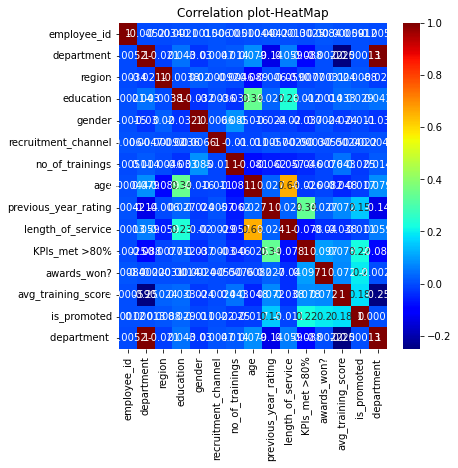

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="jet")
plt.title("Correlation plot-HeatMap")
plt.show()

In [ ]:
df.corr()['is_promoted']

employee_id             0.001206
department              0.000130
region                  0.008841
education               0.029257
gender                 -0.011109
recruitment_channel     0.002229
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.153230
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
department              0.000130
Name: is_promoted, dtype: float64

PairPlot Visualization of DataSet

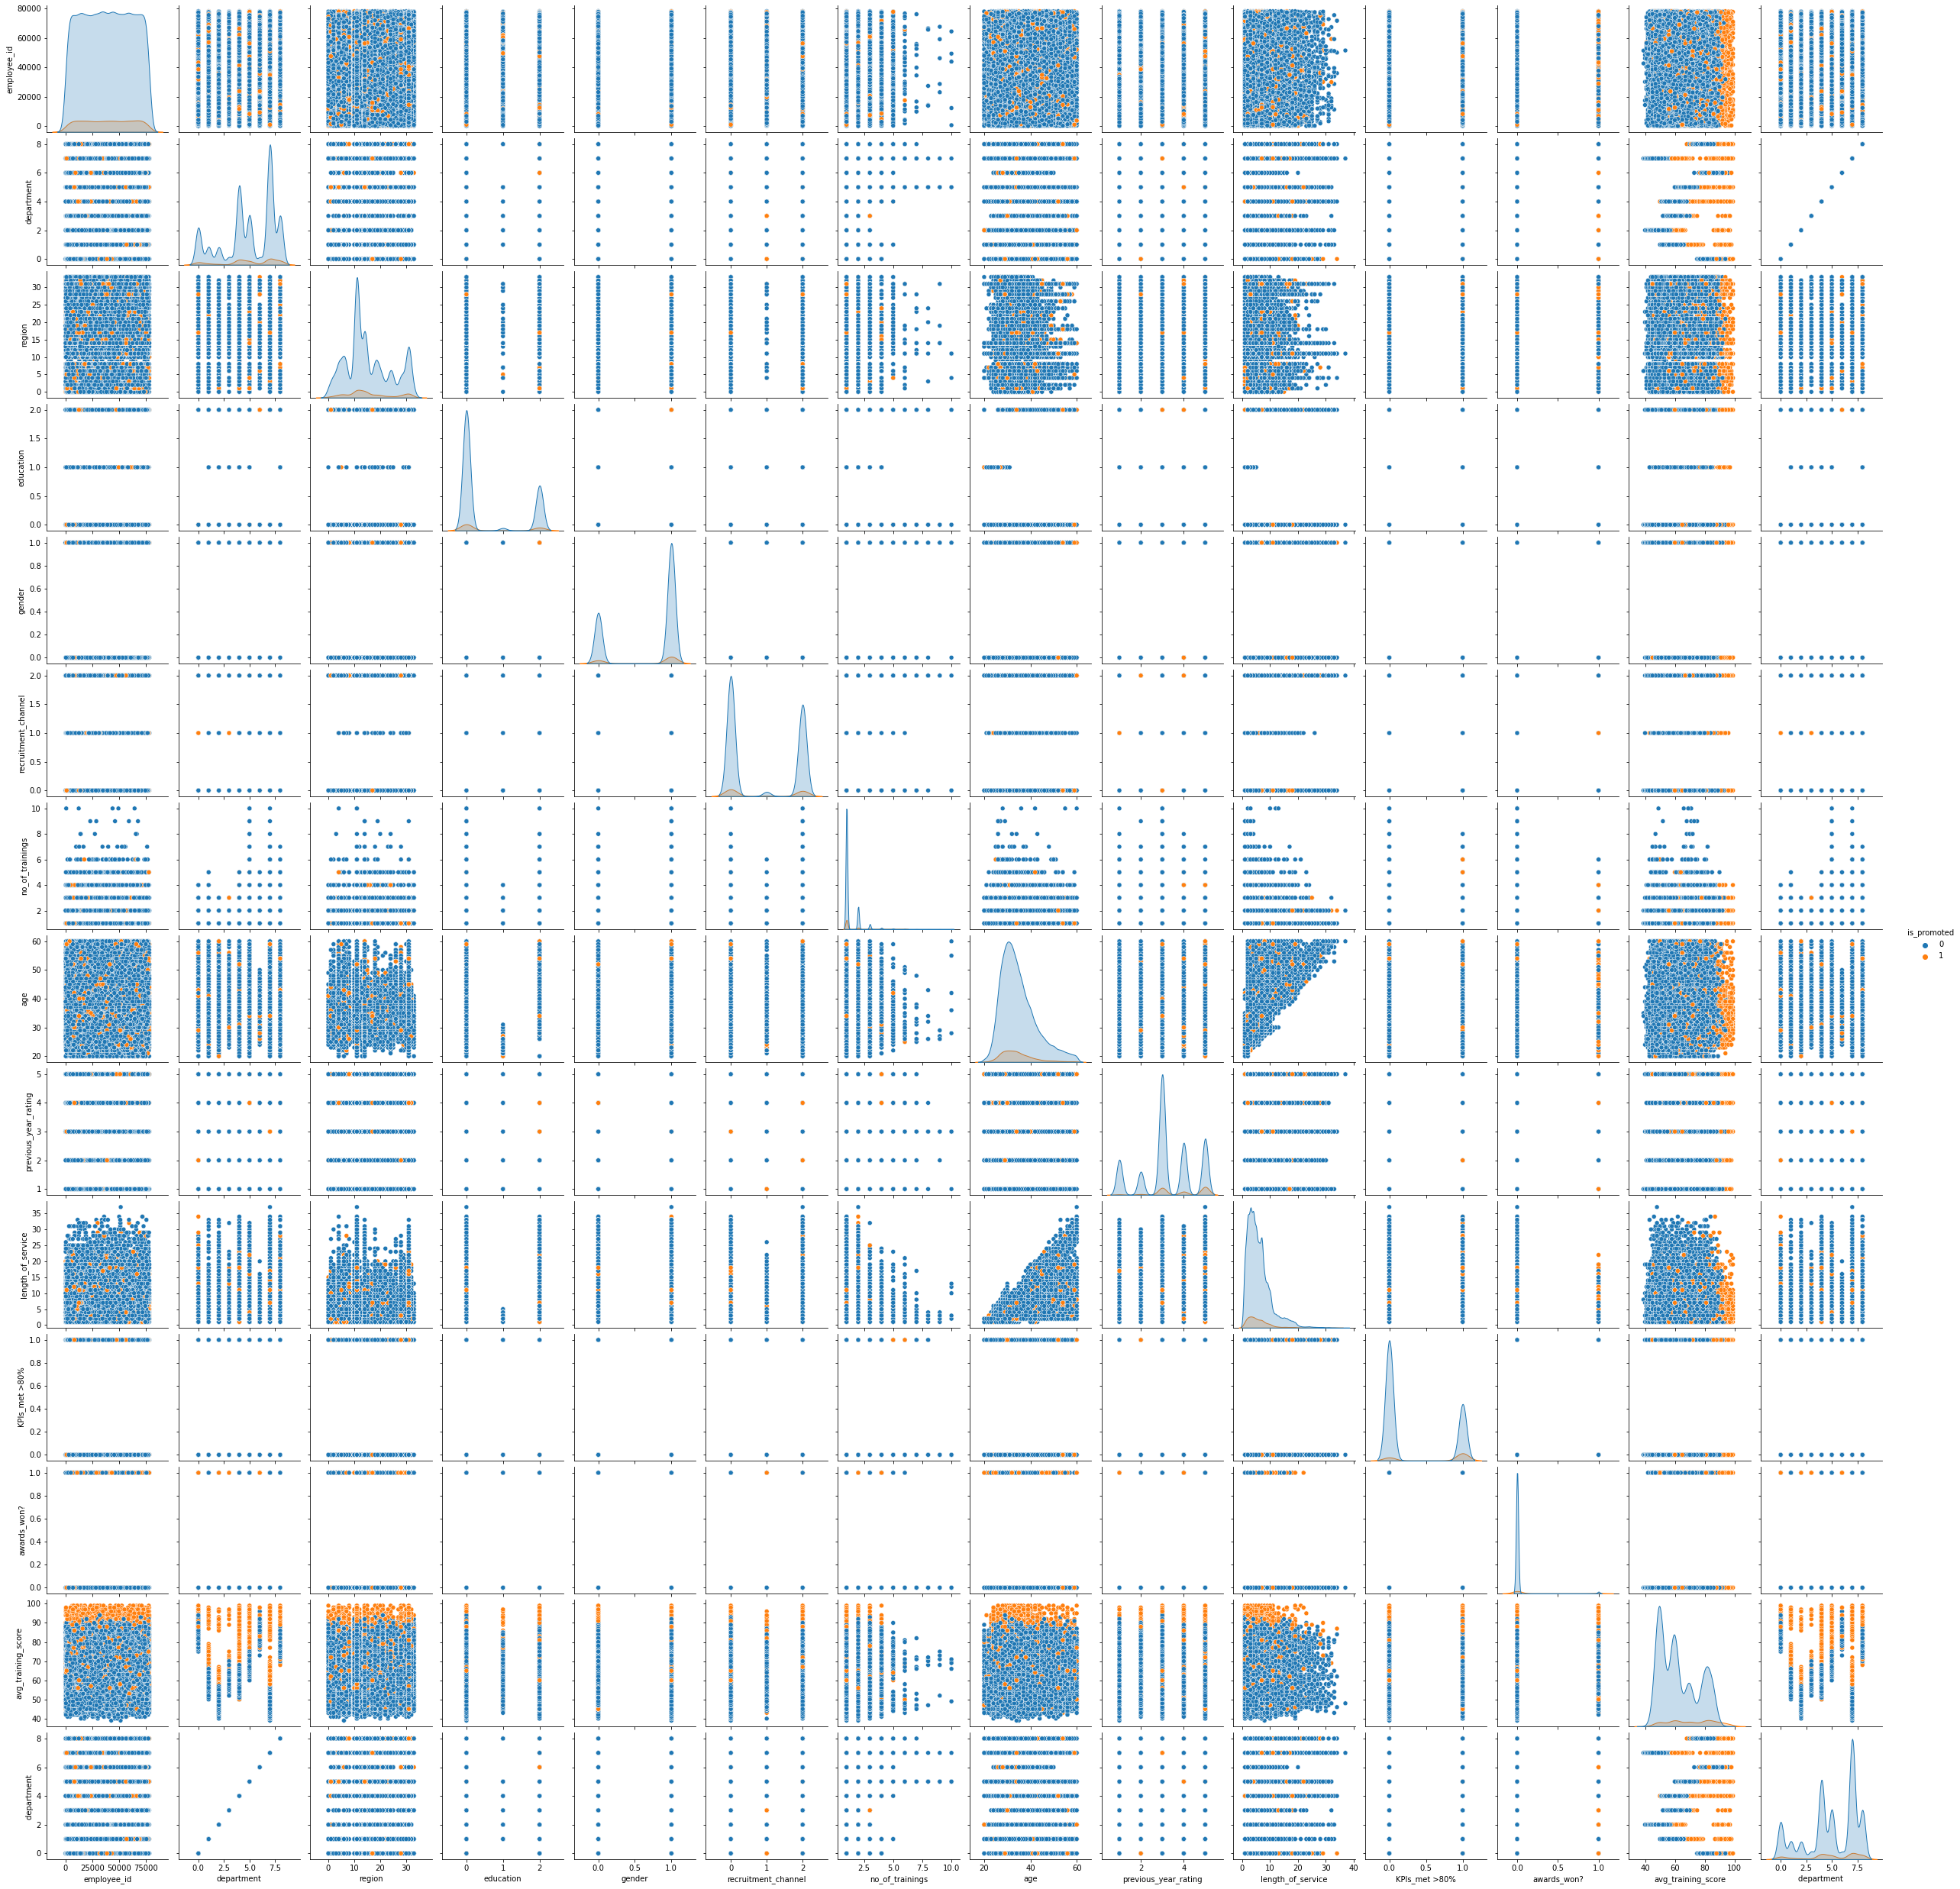

In [ ]:
sns.pairplot(df,hue="is_promoted")

In [ ]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

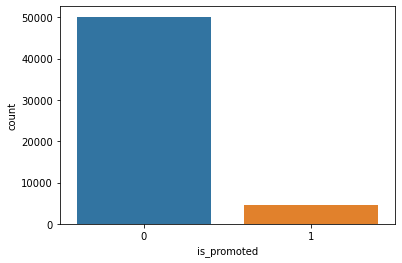

In [ ]:
sns.countplot(x='is_promoted',data=df)
plt.show()

Handling OutLiers

In [ ]:
numericalColumns = df.select_dtypes(include=np.number).columns

In [ ]:
descriateCols=[]
continuesCols=[]



for column in numericalColumns:
    if df[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [ ]:
continuesCols

['employee_id', 'region', 'age', 'length_of_service', 'avg_training_score']

In [ ]:
descriateCols

['department',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted',
 'department ']

Capping Outliers 

In [ ]:
for column in continuesCols:
    upper_lim=df[column].mean()+df[column].std() *3
    lower_lim=df[column].mean()-df[column].std() *3

    df.loc[(df[column] > upper_lim),column] = upper_lim
    df.loc[(df[column] < lower_lim),column] = lower_lim

Setting X and y value From Given Dataset

In [ ]:
X=df.drop(['is_promoted'],axis=1)
y=df['is_promoted']


Splitting  Given Data into Traning and Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

Scaling Down The Data Set Using Standardscaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

Applying SMOTE to OverCome Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X_train_sc,y_train)

In [ ]:
y_res.value_counts()

Fitting ML Algorithms

In [ ]:
log = LogisticRegression() 
rnd = RandomForestClassifier(n_estimators=100) 
adaboost = AdaBoostClassifier() 
gBoost = GradientBoostingClassifier()

svc= SVC() 
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nbc=GaussianNB()

voting = VotingClassifier( estimators=[('Logistic_Regression',log),('Decision_Tree_Classifier',dtc),('Random_Forest_Classifier',rnd), ('AdaBoost_Classifier',adaboost),('Gradient_Boosting_Classifier',gBoost),('SVC',svc)], voting='hard') 



In [ ]:
model=[log,rnd,adaboost,gBoost,svc,dtc,knn,nbc,voting]
for clf in model:
    clf.fit(X_res,y_res)
    y_pred=clf.predict(X_test_sc)
    score=clf.score(X_res,y_res)
    score1=clf.score(X_test_sc, y_test)
    mse=mean_squared_error(y_test,y_pred)
    print(f"Train Accuarcy for {clf.__class__.__name__} is {score}")
    print(f"Test Accuarcy for {clf.__class__.__name__} is {score1}")
    print(f"The RMSE value for {clf.__class__.__name__} is {mse}") 
    print("="*30) 



Train Accuarcy for LogisticRegression is 0.7234467742416559
Test Accuarcy for LogisticRegression is 0.7207386520705479
The RMSE value for LogisticRegression is 0.2792613479294521
Train Accuarcy for RandomForestClassifier is 1.0
Test Accuarcy for RandomForestClassifier is 0.9303919942500138
The RMSE value for RandomForestClassifier is 0.06960800574998618
Train Accuarcy for AdaBoostClassifier is 0.8301219912309482
Test Accuarcy for AdaBoostClassifier is 0.8138441974899099
The RMSE value for AdaBoostClassifier is 0.18615580251009012
Train Accuarcy for GradientBoostingClassifier is 0.9093715512870224
Test Accuarcy for GradientBoostingClassifier is 0.8645988831757616
The RMSE value for GradientBoostingClassifier is 0.13540111682423842
Train Accuarcy for SVC is 0.827109493840785
Test Accuarcy for SVC is 0.7310222811964394
The RMSE value for SVC is 0.2689777188035606
Train Accuarcy for DecisionTreeClassifier is 1.0
Test Accuarcy for DecisionTreeClassifier is 0.8873223862442638
The RMSE value 

HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()
xgb_clf=XGBClassifier()
knn_clf=KNeighborsClassifier()



In [ ]:
clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf,xgb_clf,knn_clf]

In [ ]:
grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}]
grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]
grid_params_xgb=[{'booster':['gbtree', 'gblinear'],'nthread':[10,15,25]}]
grid_params_knn=[{'n_neighbors':[5,7,9,11],'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[30,50,100]}]


In [ ]:
clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc,grid_params_xgb,grid_params_knn]

In [ ]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_sc,y_train)
  
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_res,y_res)}")
  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_sc,y_test)}")
  print(f"The Best Parameters for the {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.5331822113520446
The Test accuracy for the LogisticRegression() is 0.920495383424559
The Best Parameters for the LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.5488412324395263
The Test accuracy for the DecisionTreeClassifier() is 0.9212141316967988
The Best Parameters for the DecisionTreeClassifier() is {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 3, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['l